1a.


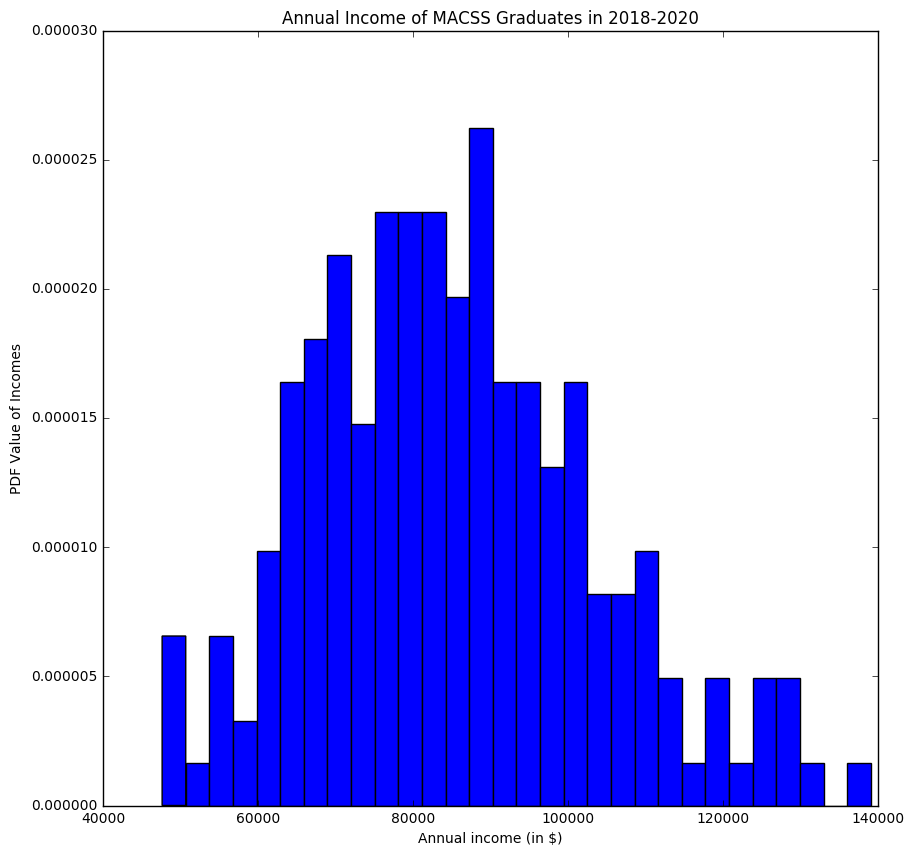

1b.
mu_GMM1= 11.3369237377 sig_GMM1= 0.213628960591
The value of GMM criterion function at the estimated parameter values is: 1.703844959e-12
Data moments are: 85276.82360625808 18037.692869371564
Model moments are:  85276.73531675598 18037.6785304


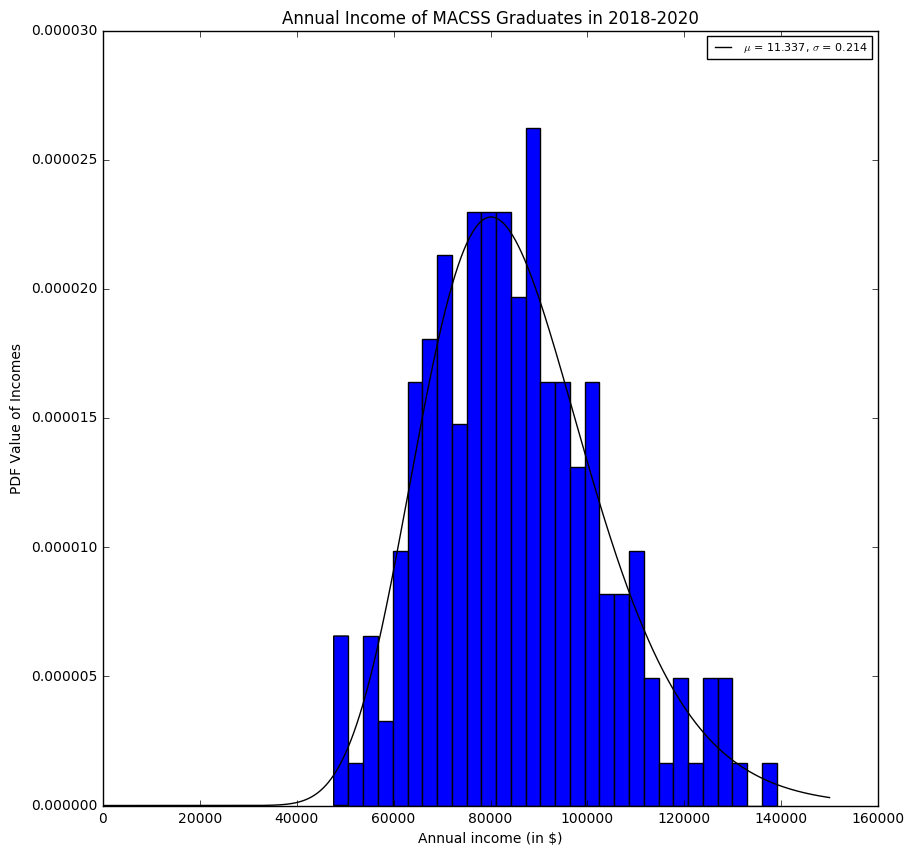

1c.
mu_GMM2= 11.3369239366 sig_GMM2= 0.21362938644
The value of GMM criterion function at the estimated parameter values is: 0.0110862517048
Data moments are: 85276.82360625808 18037.692869371564
2-step Model moments are:  85276.73531675598 18037.6785304


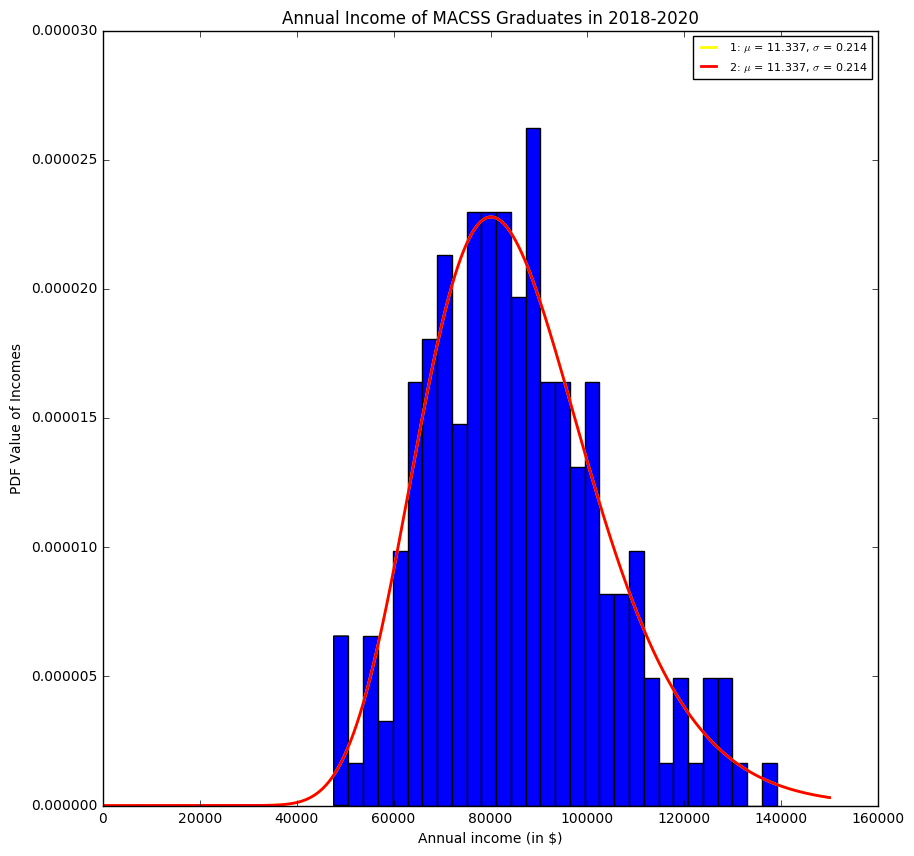

1d.
mu_GMM3= 11.3356813274 sig_GMM3= 0.21059845372
The value of GMM criterion function at the estimated parameter values is: 2.5347883616e-11
Data moments are: 0.3 0.5 0.2
Model moments are: 0.30000000363261387 0.5000000058562907 0.19999999051109518


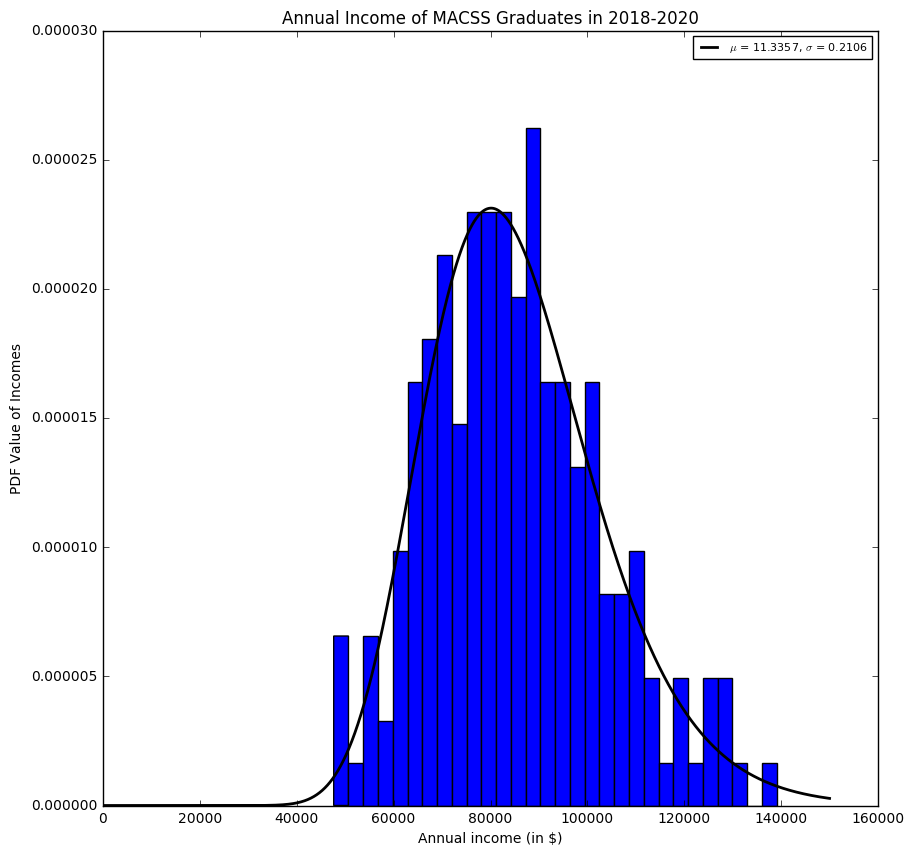

1e.
mu_GMM4= 11.1375923873 sig_GMM4= 0.481189876193
The value of GMM criterion function at the estimated parameter values is: 7.1824522242
Data moments are: 0.3 0.5 0.2
Model moments are: 0.5722693450896191 0.21003825964773393 0.21769239518881034


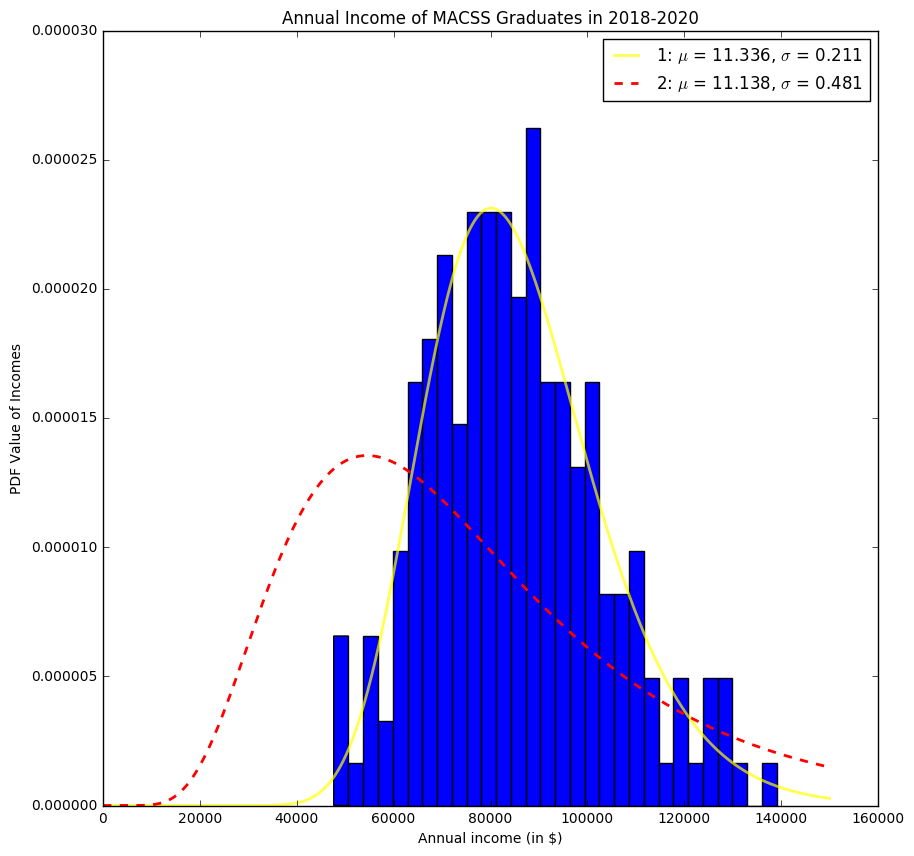

2a.
Beta0: 0.252222634225 
Beta1: 0.0130232295439 
Beta2: 0.399763391107 
Beta3: -0.0100603677526
The value of GMM criterion function at the estimated parameter values is: 0.0148567892995


In [46]:
# MACSS 30100
# PS 3
# Esha Banerjee

import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import pandas as pd

#Loading data for Problem 1
df = pd.read_table('incomes.txt', names = ['incomes'])

def lognorm_pdf(x, mu, sigma):
    '''
    Dr. Evans' code
    --------------------------------------------------------------------
    Generate pdf values from the log normal pdf with mean mu and standard
    deviation sigma. This function does the same thing as 
    sp.stats.norm.pdf(x, loc=mu, scale=sigma).
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the random variable
    sigma  = scalar > 0, standard deviation of the random variable
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals = (N,) vector, log normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    pdf_vals    = (1/(x * sigma * np.sqrt(2 * np.pi))) *\
                    np.exp( - (np.log(x) - mu)**2 / (2 * sigma**2))    
    return pdf_vals
    


def data_moments(xvals):
    '''
    Dr. Evans' code modified to calculate std in place of var
    --------------------------------------------------------------------
    This function computes the two data moments for GMM
    (mean(data), std(data)).
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N,) vector
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data = scalar, mean value of data
    std_data  = scalar > 0, standard deviation of data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: mean_data, std_data
    --------------------------------------------------------------------
    '''
    mean_data = xvals.mean()
    std_data = xvals.std()    
    return mean_data, std_data


def model_moments(mu, sigma):
    '''
    Dr. Evans' code modified to return std in place of var
    --------------------------------------------------------------------
    This function computes the two model moments for GMM
    (mean(model data), std(model data)).
    --------------------------------------------------------------------
    INPUTS:
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        lognorm_pdf()
        xfx()
        x2fx()
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_model = scalar, mean value of test scores from model
    m_m_err    = scalar > 0, estimated error in the computation of the
                 integral for the mean of the distribution
    var_model  = scalar > 0, variance of data from model
    v_m_err    = scalar > 0, estimated error in the computation of the
                 integral for the variance of the distribution
    std_model  = scalar > 0, standard deviation of data from model
                 
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: mean_model, std_model
    --------------------------------------------------------------------
    '''
    xfx = lambda x: x * lognorm_pdf(x, mu, sigma)
    (mean_model, m_m_err) = intgr.quad(xfx, 0, 150000) # modifying the lower bound of xfx from negative infinity to 0
    x2fx = lambda x: ((x - mean_model) ** 2) * lognorm_pdf(x, mu, sigma) 
    (var_model, v_m_err) = intgr.quad(x2fx, 0, 150000) # modifying the lower bound from negative infinity to 0
    std_model = np.sqrt(var_model)
    return mean_model, std_model


def err_vec(xvals, mu, sigma, simple):
    '''
    Dr. Evans' code
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for GMM.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, income data
    mu     = scalar, mean of the random variable
    sigma  = scalar > 0, standard deviation of the random variable
    simple = boolean, =True if errors are simple difference, =False if
             errors are percent deviation from data moments
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        data_moments()
        model_moments()
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data  = scalar, mean value of data
    std_data   = scalar > 0, std of data
    moms_data  = (2, 1) matrix, column vector of two data moments
    mean_model = scalar, mean value from model
    std_model  = scalar > 0, std from model
    moms_model = (2, 1) matrix, column vector of two model moments
    err_vec    = (2, 1) matrix, column vector of two moment error
                 functions
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    mean_data, std_data = data_moments(xvals)
    moms_data = np.array([[mean_data], [std_data]])
    mean_model, std_model = model_moments(mu, sigma)
    moms_model = np.array([[mean_model], [std_model]])
    if simple:
        err_vec = moms_model - moms_data 
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec


def criterion(params, *args):
    '''
    Dr. Evans' code
    --------------------------------------------------------------------
    This function computes the GMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the random variable
    sigma  = scalar > 0, standard deviation of the random variable
    args   = length 3 tuple, (xvals, cutoff, W_hat)
    xvals  = (N,) vector, values of the truncated normally distributed
             random variable
    
    W_hat  = (R, R) matrix, estimate of optimal weighting matrix
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        lognorm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    err        = (2, 1) matrix, column vector of two moment error
                 functions
    crit_val   = scalar > 0, GMM criterion function value
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, W = args
    err = err_vec(xvals, mu, sigma, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err)     
    return crit_val

def data_moments3(xvals):
    '''
    Dr. Evans' code
    --------------------------------------------------------------------
    This function computes the four data moments for GMM
    (binpct_1, binpct_2, binpct_3).
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N,) vector, income data

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    bpct_1_dat = scalar in [0, 1], percent of observations
                 0 <= x < 75000
    bpct_2_dat = scalar in [0, 1], percent of observations
                 75000 <= x < 100000
    bpct_3_dat = scalar in [0, 1], percent of observations
                 100000 <= x    

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: bpct_1, bpct_2, bpct_3
    --------------------------------------------------------------------
    '''
    bpct_1_dat = xvals[xvals < 75000].shape[0] / xvals.shape[0]
    bpct_2_dat = (xvals[(xvals >=75000) & (xvals < 100000)].shape[0] /
                  xvals.shape[0])
    bpct_3_dat = (xvals[xvals >=100000].shape[0] /
                  xvals.shape[0])
    return (bpct_1_dat, bpct_2_dat, bpct_3_dat)


def model_moments3(mu, sigma):
    '''
    Dr. Evans' code
    --------------------------------------------------------------------
    This function computes the four model moments for GMM
    (bpct_1, bpct_2, bpct_3).
    --------------------------------------------------------------------
    INPUTS:
    mu     = scalar, mean of the random variable
    sigma  = scalar > 0, standard deviation of the random variable
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        lognorm_pdf()
        xfx()
    
    OBJECTS CREATED WITHIN FUNCTION:
    bpct_1_mod = scalar in [0, 1], percent of model observations in
                 bin 1
    bp_1_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_1_mod
    bpct_2_mod = scalar in [0, 1], percent of model observations in
                 bin 2
    bp_2_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_2_mod
    bpct_3_mod = scalar in [0, 1], percent of model observations in
                 bin 3
    bp_3_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_3_mod
    
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: bpct_1_mod, bpct_2_mod, bpct_3_mod
    --------------------------------------------------------------------
    '''
    xfx = lambda x: lognorm_pdf(x, mu, sigma)
    (bpct_1_mod, bp_1_err) = intgr.quad(xfx, 0, 75000)
    (bpct_2_mod, bp_2_err) = intgr.quad(xfx, 75000, 100000)
    (bpct_3_mod, bp_3_err) = intgr.quad(xfx, 100000, 1500000)    
    return bpct_1_mod, bpct_2_mod, bpct_3_mod


def err_vec3(xvals, mu, sigma, simple):
    '''
    Dr. Evans' code
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for GMM.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, income data
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    
    simple = boolean, =True if errors are simple difference, =False if
             errors are percent deviation from data moments
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        data_moments3()
        model_moments3()
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data  = scalar, mean value of data
    std_data   = scalar > 0, stdof data
    moms_data  = (2, 1) matrix, column vector of two data oments
    mean_model = scalar, mean value from model
    std_model  = scalar > 0, std from model
    moms_model = (2, 1) matrix, column vector of two model moments
    err_vec    = (2, 1) matrix, column vector of two moment error
                 functions
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    bpct_1_dat, bpct_2_dat, bpct_3_dat = data_moments3(xvals)
    moms_data = np.array([[bpct_1_dat], [bpct_2_dat], [bpct_3_dat]])
    bpct_1_mod, bpct_2_mod, bpct_3_mod = model_moments3(mu, sigma)
    moms_model = np.array([[bpct_1_mod], [bpct_2_mod], [bpct_3_mod]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = 100 * ((moms_model - moms_data) / moms_data)
    return err_vec


def criterion3(params, *args):
    '''
     Dr. Evans' code
    --------------------------------------------------------------------
    This function computes the GMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the random variable
    sigma  = scalar > 0, standard deviation of the random variable
    args   = length 3 tuple, (xvals, cutoff, W_hat)
    xvals  = (N,) vector, values of the truncated normally distributed
             random variable
    W_hat  = (R, R) matrix, estimate of optimal weighting matrix
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        err_vec3()
    
    OBJECTS CREATED WITHIN FUNCTION:
    err        = (4, 1) matrix, column vector of four moment error
                 functions
    crit_val   = scalar > 0, GMM criterion function value
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, W = args
    err = err_vec3(xvals, mu, sigma, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err)
    return crit_val

#1a
print('1a.')
graph = True
...
if graph:
    
    # Create directory if images directory does not already exist
    cur_path = os.path.split(os.path.abspath("__file__"))[0]
    output_fldr = "images for Persp_Model PS3"
    output_dir = os.path.join(cur_path, output_fldr)
    if not os.access(output_dir, os.F_OK):
        os.makedirs(output_dir)

    # Plotting histogram of percentages
    fig = plt.figure(figsize = (10,10))
    count, bins, ignored = plt.hist(df['incomes'], 30, normed = True)   
    plt.title('Annual Income of MACSS Graduates in 2018-2020', fontsize = 12)
    plt.xlabel(r'Annual income (in $)')
    plt.ylabel(r'PDF Value of Incomes')
    output_path = os.path.join(output_dir, 'Fig_1a')
    plt.savefig(output_path)
    plt.show()
    plt.close()

#1b    
mu_init = 9.0
std_init = 0.3
params_init = np.array([mu_init, std_init])
W_hat = np.eye(2)
gmm_args = (df['incomes'], W_hat)
results = opt.minimize(criterion, params_init, args=(gmm_args),
                  method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM1, sig_GMM1 = results.x
params_GMM = np.array([mu_GMM1, sig_GMM1])
value = criterion(params_GMM, *gmm_args)[0][0]
mu_data, std_data = data_moments(df['incomes'])
mu_model, std_model = model_moments(mu_GMM1, sig_GMM1)
print('1b.')
print('mu_GMM1=', mu_GMM1, 'sig_GMM1=', sig_GMM1)
print('The value of GMM criterion function at the estimated parameter values is:', value)
print('Data moments are:', mu_data, std_data)
print('Model moments are: ', mu_model, std_model)

graph = True
if graph:
    fig = plt.figure(figsize = (10,10))
    count, bins, ignored = plt.hist(df['incomes'], 30, normed = True)
    plt.title('Annual Income of MACSS Graduates in 2018-2020', fontsize = 12)
    plt.xlabel(r'Annual income (in $)')
    plt.ylabel(r'PDF Value of Incomes')
    dist_pts = np.linspace(0, 150000, 10000)
    plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_GMM1, sig_GMM1),
    color='black', label=
    '$\mu$ = {:.3f}, $\sigma$ = {:.3f}'.format(mu_GMM1, sig_GMM1))
    plt.legend(loc='upper right', prop={'size':8})
    output_path = os.path.join(output_dir, 'Fig_1b')
    plt.savefig(output_path)
    plt.show()
    plt.close()
    
#1c
mu_init = 11.0
std_init = 0.2

err1 = err_vec(df['incomes'], mu_GMM1, sig_GMM1, False)
VCV2 = np.dot(err1, err1.T) / df['incomes'].shape[0]
W_hat2 = lin.pinv(VCV2)
params_init = np.array([mu_GMM1, sig_GMM1])
gmm_args = (df['incomes'], W_hat2)
results = opt.minimize(criterion, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM2, sig_GMM2 = results.x
params_GMM = np.array([mu_GMM2, sig_GMM2])
value = criterion(params_GMM, *gmm_args)[0][0]
mu_data, std_data = data_moments(df['incomes'])
mu_model2, std_model2 = model_moments(mu_GMM2, sig_GMM2)
print('1c.')
print('mu_GMM2=', mu_GMM2, 'sig_GMM2=', sig_GMM2)
print('The value of GMM criterion function at the estimated parameter values is:',value)
print('Data moments are:', mu_data, std_data)
print('Model moments are: ', mu_model, std_model)

graph = True
if graph:
    fig = plt.figure(figsize = (10,10))
    count, bins, ignored = plt.hist(df['incomes'], 30, normed = True)
    plt.title('Annual Income of MACSS Graduates in 2018-2020', fontsize = 12)
    plt.xlabel(r'Annual income (in $)')
    plt.ylabel(r'PDF Value of Incomes')
    
    dist_pts = np.linspace(0, 150000, 10000)
    plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_GMM1, sig_GMM1),
    linewidth=2, color='yellow', label=
    '1: $\mu$ = {:.3f}, $\sigma$ = {:.3f}'.format(mu_GMM1, sig_GMM1))
    plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_GMM2, sig_GMM2),
    linewidth=2, color='red', label=
    '2: $\mu$ = {:.3f}, $\sigma$ = {:.3f}'.format(mu_GMM2, sig_GMM2))
    plt.legend(loc='upper right', prop={'size':8})
    output_path = os.path.join(output_dir, 'Fig_1c')
    plt.savefig(output_path)
    plt.show()
    plt.close()
    
#1d

params_init = np.array([mu_init, std_init])
W_hat = np.eye(3)
gmm_args = (df['incomes'], W_hat)
results = opt.minimize(criterion3, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM3, sig_GMM3 = results.x
params_GMM = np.array([mu_GMM3, sig_GMM3])
value = criterion3(params_GMM, *gmm_args)[0][0]
bpct_1_dat, bpct_2_dat, bpct_3_dat = data_moments3(df['incomes'])
bpct_1_mod, bpct_2_mod, bpct_3_mod = model_moments3(mu_GMM3, sig_GMM3)
print('1d.')
print('mu_GMM3=', mu_GMM3, 'sig_GMM3=', sig_GMM3)
print('The value of GMM criterion function at the estimated parameter values is:',value)
print('Data moments are:', bpct_1_dat, bpct_2_dat, bpct_3_dat)
print('Model moments are:', bpct_1_mod, bpct_2_mod, bpct_3_mod)

graph = True
if graph:
    fig = plt.figure(figsize = (10,10))
    count, bins, ignored = plt.hist(df['incomes'], 30, normed = True)
    plt.title('Annual Income of MACSS Graduates in 2018-2020', fontsize = 12)
    plt.xlabel(r'Annual income (in $)')
    plt.ylabel(r'PDF Value of Incomes')
    dist_pts = np.linspace(0, 150000, 10000)
    plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_GMM3, sig_GMM3),
    linewidth=2, color='black', label=
    '$\mu$ = {:.4f}, $\sigma$ = {:.4f}'.format(mu_GMM3, sig_GMM3))
    plt.legend(loc='upper right', prop={'size':8})
    output_path = os.path.join(output_dir, 'Fig_1d')
    plt.savefig(output_path)
    plt.show()
    plt.close()
    


### Problem 1e:
err3 = err_vec3(df['incomes'], mu_GMM3, sig_GMM3, False)
VCV2 = np.dot(err3, err3.T) / df['incomes'].shape[0]
W_hat2 = lin.pinv(VCV2)
params_init = np.array([mu_init, std_init])
gmm_args = (df['incomes'], W_hat2)
results = opt.minimize(criterion3, params_init, args=(gmm_args),
                method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM4, sig_GMM4 = results.x
params_GMM = np.array([mu_GMM4, sig_GMM4])
value = criterion3(params_GMM, *gmm_args)[0][0]
bpct_1_dat, bpct_2_dat, bpct_3_dat = data_moments3(df['incomes'])
bpct_1_mod2, bpct_2_mod2, bpct_3_mod2 = model_moments3(mu_GMM4, sig_GMM4)
print('1e.')
print('mu_GMM4=', mu_GMM4, 'sig_GMM4=', sig_GMM4)
print('The value of GMM criterion function at the estimated parameter values is:',value)
print('Data moments are:', bpct_1_dat, bpct_2_dat, bpct_3_dat)
print('Model moments are:', bpct_1_mod2, bpct_2_mod2, bpct_3_mod2)

   
graph = True
if graph:
    fig = plt.figure(figsize = (10,10))
    count, bins, ignored = plt.hist(df['incomes'], 30, normed = True)
    plt.title('Annual Income of MACSS Graduates in 2018-2020', fontsize = 12)
    plt.xlabel(r'Annual income (in $)')
    plt.ylabel(r'PDF Value of Incomes')
    dist_pts = np.linspace(0, 150000, 10000)
    plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_GMM3, sig_GMM3),
         linewidth=2, color='yellow', label=
         '1: $\mu$ = {:.3f}, $\sigma$ = {:.3f}'.format(mu_GMM3, sig_GMM3),
          alpha = 0.7)
    plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_GMM4, sig_GMM4),
                       linewidth=2, color='red', label=
        '2: $\mu$ = {:.3f}, $\sigma$ = {:.3f}'.format(mu_GMM4, sig_GMM4),
        linestyle = '--')
    plt.legend(loc='upper right')
    output_path = os.path.join(output_dir, 'Fig_1e')
    plt.savefig(output_path)
    plt.show()
    plt.close()

#Loading data for Problem 2
df = pd.read_csv('sick.txt', skiprows = 1, names = ['sick', 'age', 'children', 'avgtemp_winter'])
#Initializing betas
params_init_sick = np.array([0,0,0,0])

def err_vec_sick(xvals, params, simple):
    '''
    Dr. Evans' code
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for GMM.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, sick data
    params = beta0, beta1, beta2, beta3
    
    simple = boolean, =True if errors are simple difference, =False if
             errors are percent deviation from data moments
    
        
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    beta0, beta1, beta2, beta3 = params
    moms_data = np.array(xvals['sick'])
    moms_model = beta0 + beta1 * xvals['age'] + beta2 * xvals['children'] + beta3 * xvals['avgtemp_winter']

    if simple:
        err_vec_sick = moms_model - moms_data
    else:
        err_vec_sick = (moms_model - moms_data) / moms_data

    return err_vec_sick


def criterion_sick(params, xvals, cutoff, W):
    '''
     Dr. Evans' code
    --------------------------------------------------------------------
    This function computes the GMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params = (4,) vector, ([beta0, beta1, beta2, beta3])
    xvals  = (N,) vector, values of the random variable
    W  = (R, R) matrix, estimate of optimal weighting matrix
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        err_vec_sick()
    
    OBJECTS CREATED WITHIN FUNCTION:
    err        = (4, 1) matrix, column vector of four moment error
                 functions
    crit_val   = scalar > 0, GMM criterion function value
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    err = err_vec_sick(xvals, params, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err)
    return crit_val
# 2
W_hat = np.eye(200)
gmm_args = (df, 'None', W_hat)
results = opt.minimize(criterion_sick, params_init_sick, args=((df, np.inf, W_hat)),
        method='L-BFGS-B')
beta0_GMM, beta1_GMM, beta2_GMM, beta3_GMM = results.x
params_GMM_sick = np.array([beta0_GMM, beta1_GMM,beta2_GMM, beta3_GMM ])
print ('2a.')
print("Beta0:", beta0_GMM, "\nBeta1:", beta1_GMM, "\nBeta2:", beta2_GMM, "\nBeta3:", beta3_GMM)
GMM_value = criterion_sick(params_GMM_sick, *gmm_args)
print("The value of GMM criterion function at the estimated parameter values is:", GMM_value)



